<a href="https://colab.research.google.com/github/Ashwinikh297/R.Discriptive-Statistics/blob/main/Assignment_4_Q_1_(SLR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [11]:
# Load the dataset
dataset=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Simple%20Linear%20Regression/delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


##EDA and Visualization

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [13]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


##Feature engineering

In [15]:
data=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [17]:
from scipy.stats import skew
print(skew(data.delivery_time))

0.326702631656106


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


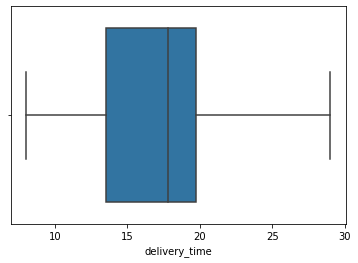

In [22]:
sns.boxplot(data['delivery_time'])

In [24]:
#The data for Delivery time is skewed left.
#All the observations lies in the intervals of approximately 13 to 20
#We can say that the median delivery time is around 18-19.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


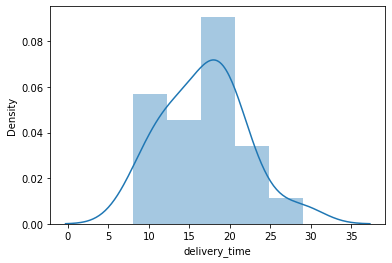

In [26]:
sns.distplot(data['delivery_time'])

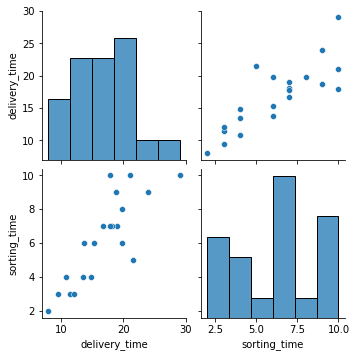

In [28]:
sns.pairplot(data)

##Correlation Analysis

In [30]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


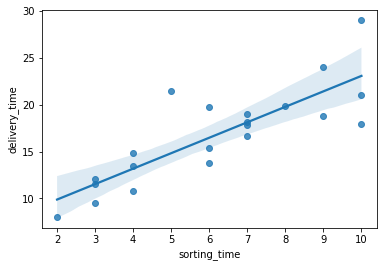

In [32]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

##Model Building

In [34]:
model1=smf.ols("delivery_time~sorting_time",data=data).fit()

##Model testing

In [36]:
# Finding Coefficient parameters
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [38]:
# Finding tvalues and pvalues
model1.tvalues , model1.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [40]:
# Finding Rsquared Values
model1.rsquared , model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

##Model Predictions

In [42]:
# Manual prediction for say sorting time 6
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [44]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [46]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [47]:
model1.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64